In [1]:
import pandas as pd
from neuralnet import *

# Load the configuration.
config = load_config("./config1.yaml")

# Load the data
x_input, y_input = load_data(path="./data/", mode="train")
x_test,  y_test  = load_data(path="./data/", mode="test")

ind  = int(x_input.shape[0]*0.99)
x_train, x_valid = x_input[:ind,:], x_input[ind:,:]
y_train, y_valid = y_input[:ind,:], y_input[ind:,:]

Accuracy_Dict = {}


epoch0, val=0.128, train_acc=0.11197979797979798
epoch20, val=0.242, train_acc=0.24206060606060606
epoch40, val=0.292, train_acc=0.32307070707070706
epoch60, val=0.38, train_acc=0.36573737373737375
epoch80, val=0.384, train_acc=0.4022222222222222
Accuracy:  0.4174


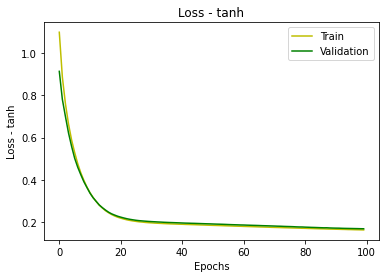

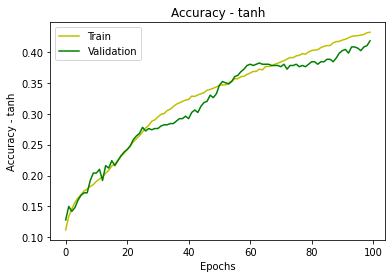

In [2]:
config['activation'] = 'tanh'
# Create the model
model  = Neuralnetwork(config)

train_losses_tanh, val_losses, train_accs_tanh, val_accs = train(model, x_train, y_train, x_valid, y_valid, config)
test_acc = test(model, x_test, y_test)

# Plots
print("Accuracy: ", test_acc)
plot(train_losses_tanh, val_losses, 'Loss - tanh')
plot(train_accs_tanh, val_accs, 'Accuracy - tanh')

Accuracy_Dict['tanh'] = test_acc
del model

epoch0, val=0.26, train_acc=0.22145454545454546
epoch20, val=0.394, train_acc=0.4377171717171717
epoch40, val=0.438, train_acc=0.48915151515151517
epoch60, val=0.46, train_acc=0.5057373737373737
epoch80, val=0.482, train_acc=0.5224444444444445
Accuracy:  0.4968


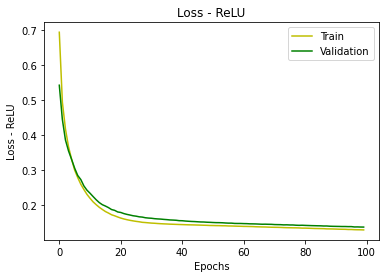

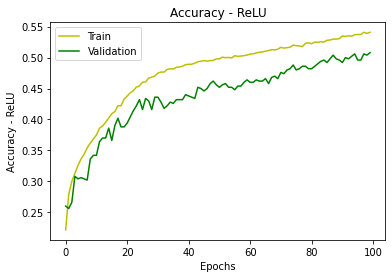

In [3]:
config['activation'] = 'ReLU'
# Create the model
model  = Neuralnetwork(config)

train_losses_relu, val_losses, train_accs_relu, val_accs = train(model, x_train, y_train, x_valid, y_valid, config)
test_acc = test(model, x_test, y_test)

# Plots
print("Accuracy: ", test_acc)
plot(train_losses_relu, val_losses, 'Loss - ReLU')
plot(train_accs_relu, val_accs, 'Accuracy - ReLU')

Accuracy_Dict['ReLU'] = test_acc
del model

epoch0, val=0.256, train_acc=0.22963636363636364
epoch20, val=0.408, train_acc=0.44602020202020204
epoch40, val=0.444, train_acc=0.49226262626262624
epoch60, val=0.462, train_acc=0.5062424242424243
epoch80, val=0.476, train_acc=0.5185252525252525
Accuracy:  0.5026


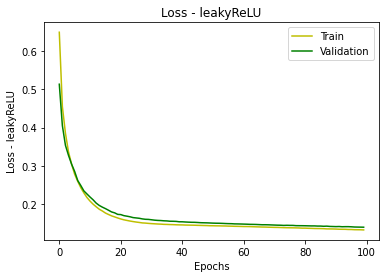

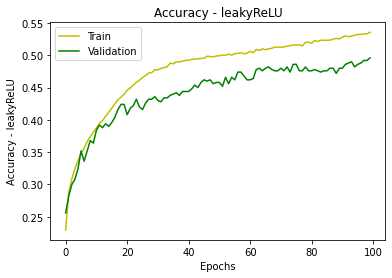

In [4]:
config['activation'] = 'leakyReLU'

# Create the model
model  = Neuralnetwork(config)

train_losses_lrelu, val_losses, train_accs_lrelu, val_accs = train(model, x_train, y_train, x_valid, y_valid, config)
test_acc = test(model, x_test, y_test)

# TODO: Plots
print("Accuracy: ", test_acc)
plot(train_losses_lrelu, val_losses, 'Loss - leakyReLU')
plot(train_accs_lrelu, val_accs, 'Accuracy - leakyReLU')

Accuracy_Dict['leakyReLU'] = test_acc
del model

In [5]:
print(config)
test_performance = pd.DataFrame.from_dict(Accuracy_Dict, orient = 'index')
test_performance.reset_index(inplace = True)
test_performance.columns = ['Activation','Test accuracy']
test_performance

{'layer_specs': [3072, 64, 64, 10], 'activation': 'leakyReLU', 'learning_rate': 0.005, 'batch_size': 128, 'epochs': 100, 'early_stop': True, 'early_stop_epoch': 5, 'L2_penalty': 0.001, 'momentum': True, 'momentum_gamma': 0.9}


,Activation,Test accuracy
0,tanh,0.4174
1,ReLU,0.4968
2,leakyReLU,0.5026


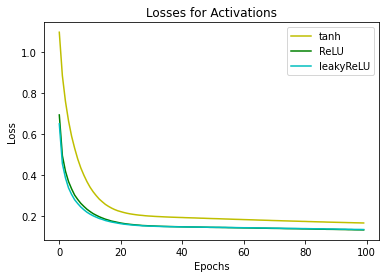

In [6]:
plt.plot(train_losses_tanh, color='y', label='tanh')
plt.plot(train_losses_relu, color='g', label='ReLU')
plt.plot(train_losses_lrelu, color='c', label='leakyReLU')
plt.title("Losses for Activations")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.savefig('Fig_7.png')

In [7]:
print(test_performance.to_latex())

\begin{tabular}{llr}
\toprule
{} & Activation &  Test accuracy \\
\midrule
0 &       tanh &         0.4174 \\
1 &       ReLU &         0.4968 \\
2 &  leakyReLU &         0.5026 \\
\bottomrule
\end{tabular}

